In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
files = os.listdir('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results')

In [3]:
dfs = []
for f in files:
    df1 = pd.read_csv('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results\\Adygeja_Resp_2022-03-20.csv', encoding = 'utf-8')
    dfs.append(df1)

In [4]:
data = pd.concat(dfs)

In [5]:
results = pd.read_excel(r'C:\\Users\\gosti\\Downloads\\Telegram Desktop\\01_04_D_New_loans_subj.xlsx', sheet_name='итого', header=1)

In [6]:
data = data.drop(columns=data[['customer inn', 'supplier inn', 'protocol date', 'doc']])
data = data.assign(bg=data.amount / data.price)
data = data.drop_duplicates()
data = data[data.bg <= 1]
data

,Unnamed: 0,obj hash,name,reg num,sign date,suppliers count,st date,end date,price,enforcement,amount,bg
0,0,3793294491059705333,contracts_output,1010101008321000004,2021-09-27,1,2021-09-27,2021-12-31,500000.00,1,25000.00,0.050000
1,1,-4348589201702449915,contracts_output,1010400570119000014,2019-08-08,1,2021-01-01,2021-12-31,933718.40,1,373500.00,0.400014
2,2,7104910193783858246,contracts_output,1010400570119000016,2019-09-03,1,2021-01-01,2021-12-31,125125.25,0,6256.26,0.050000
3,3,-1585908082334183978,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,355169.38,1,19878.00,0.055968
4,4,-3961364508861951295,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,388020.88,1,19878.00,0.051229
...,...,...,...,...,...,...,...,...,...,...,...,...
6359,6359,-4906157625135826188,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6360,6360,-8165939967697628755,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6361,6361,-725861710018253917,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106600.00,1,5500.00,0.051595
6362,6362,-2881107635711435453,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106599.90,1,5500.00,0.051595


In [7]:
data['st date'] = data['st date'].astype('datetime64[ns]')
data['end date'] = data['end date'].astype('datetime64[ns]')

In [8]:
date_list = pd.date_range('01.01.2019', '01.05.2023', freq='M')

In [9]:
t = (data.iloc[1])

In [10]:
d = list(map(lambda x: datetime.datetime(2019,6,25)<= x<= datetime.datetime(2021,12,31),date_list))

In [11]:
def check(st, end):
    return list(map(lambda x: st<= x <= end, date_list))

In [12]:
t_arr = np.zeros(len(date_list))

In [13]:
for r in data.iterrows():
    t_arr+=np.array(check(r[1]['st date'], r[1]['end date'])) * r[1]['amount']

In [14]:
df = pd.DataFrame(t_arr)

<AxesSubplot:>

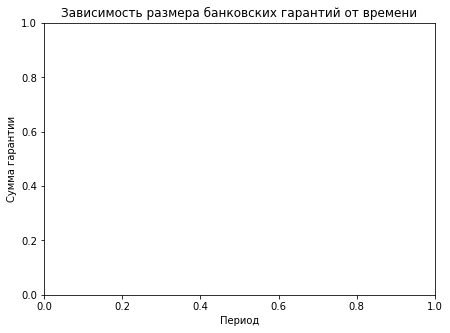

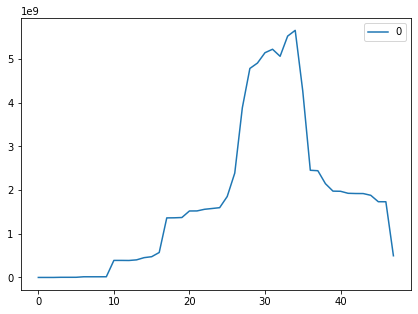

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,5
plt.xlabel('Период')
plt.ylabel('Сумма гарантии')
plt.title('Зависимость размера банковских гарантий от времени')
df.plot()

# Задачи
* Подгрузка данных и их форматирование
* Анализ Корреляции двух рядов
* Продумать методы прогнозирования ряда
 + Какие модели можно использовать
 + Что делать с идеей аккумулирующего эффекта
 + Первый драфт


In [16]:
res = pd.DataFrame(results.iloc[0])

In [17]:
res1 = pd.DataFrame(res[-43:])
res1 = res1.rename_axis('date').reset_index()
res1 = res1.rename(columns={0: "credit"})
res1['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')
res1 = res1.set_index('date')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
df2 = pd.DataFrame(df[:43])

In [19]:
df2 = df2.rename(columns={0: "amount"})
df2 = df2.rename_axis('date').reset_index()
df2['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
df2 = df2.set_index('date')

In [21]:
data1 = pd.concat([df2,res1], axis=1, join='inner')

In [22]:
data1['N'] = list(range(1,44))
data1 = data1.reindex(columns=['N', 'credit', 'amount'])

In [23]:
data1

,N,credit,amount
date,,,
2019-01-31,1,3202534,0.000000e+00
2019-02-28,2,3504045,0.000000e+00
2019-03-31,3,4174296,0.000000e+00
2019-04-30,4,4637280,3.351258e+06
2019-05-31,5,3345201,3.351258e+06
2019-06-30,6,4124086,3.512462e+06
2019-07-31,7,5143083,1.527409e+07
2019-08-31,8,5062245,1.527409e+07
2019-09-30,9,5264321,1.527409e+07


In [24]:
r1 = data1.N.corr(data1.amount)
r2 = data1.credit.astype(int).corr(data1.amount)
print('Значение коэффициента корреляции между объемом банковских гарантий и периодом = ', np.round(r1, 3))
print('Значение коэффициента корреляции между объемом банковских гарантий и периодом = ', np.round(r2, 3))

Значение коэффициента корреляции между объемом банковских гарантий и периодом =  0.735
Значение коэффициента корреляции между объемом банковских гарантий и периодом =  0.657


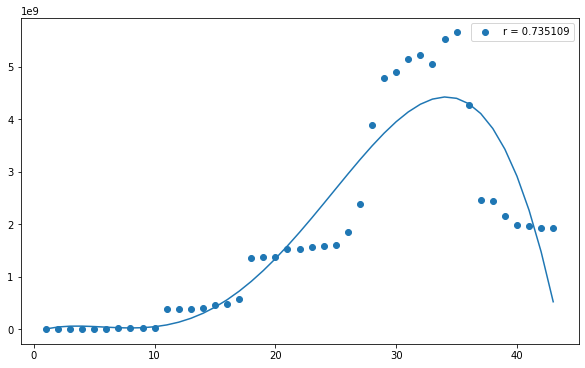

In [25]:
x = data1.N
y = data1.amount
z = np.polyfit (x, y, 4 )
p = np.poly1d (z)

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot (x, p(x))
plt.legend(['r = 0.735109'])
plt.show()

In [26]:
x2 = data1.credit.astype(int)
y2 = new_data.amount
plt.figure(figsize=(10,6))
plt.scatter(x2,y2)
plt.legend(['r = 0.656859'])
plt.show()

NameError: name 'new_data' is not defined

In [ ]:
import scipy.stats

## Прогнозирование
sklearn:
* OLS и GLS - разница
* Регуляризация L1, L2

Этапы жизни модели:
* EDA
* preprocessing (Standartscaler, RFE and feature selection)
* data to : train, test, predict
    + fit
    + predict on test ( Metrics: r2,MAPE,MAE)
    + predict on predict with fitting on train+test


y = x0 + a1x1 + b(x2)^ + a2*t

### Что посмотреть:
* Борьба с сезнонностью (Ряд Фурье, STL разложение)
* Модели Экспоненциального сглаживания  (ETS Хольт-Уинтерс)
* ACF
* stl = STL(*params)
* res = stl.fit(y)

**Визуализация данных**

<AxesSubplot:title={'center':'Гистограмма распределения гарантий'}>

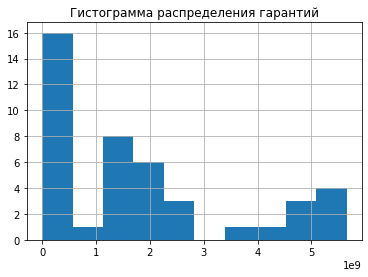

In [28]:
plt.title('Гистограмма распределения гарантий')
rcParams['figure.figsize'] = 7,5
data1.amount.hist()

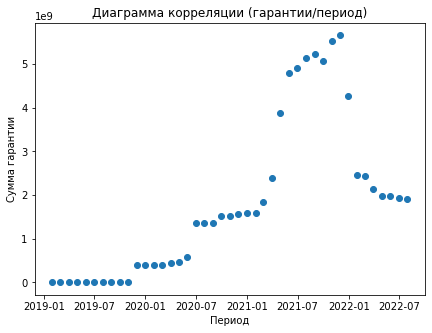

In [29]:
plt.title('Диаграмма корреляции (гарантии/период)')
plt.scatter(data1.index, data1.amount)
plt.xlabel('Период')
plt.ylabel('Сумма гарантии')
plt.show()

In [96]:
stl = STL(df2, period=6).fit()

In [31]:
from pylab import rcParams

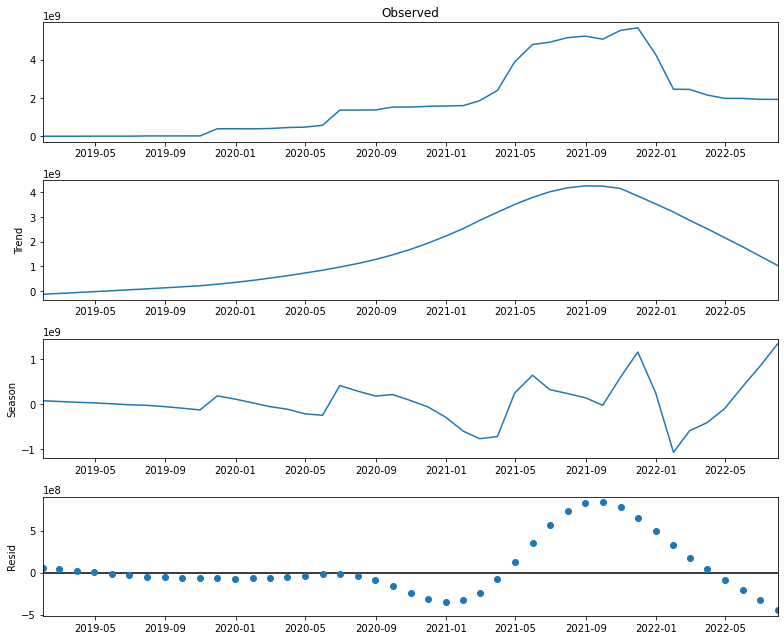

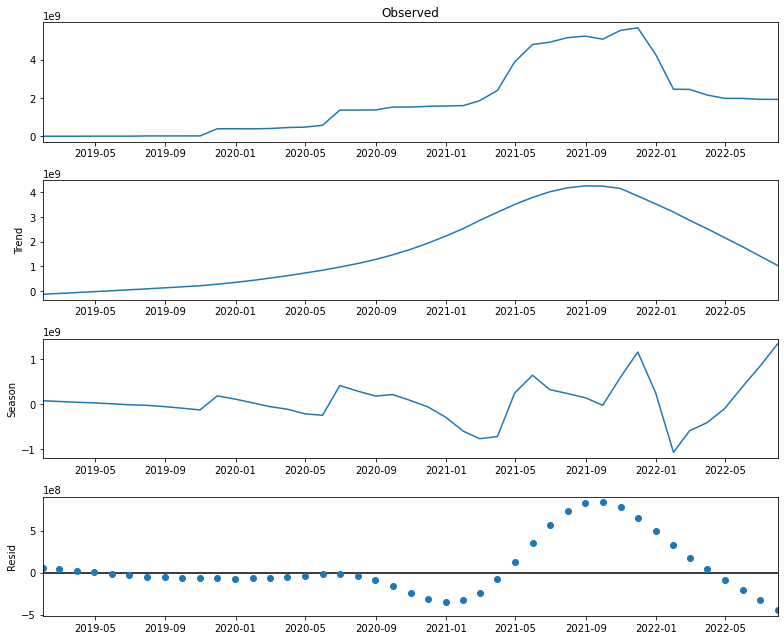

In [94]:
rcParams['figure.figsize'] = 11,9
stl.plot()

In [33]:
observed = pd.DataFrame(stl.observed)
season = pd.DataFrame(stl.seasonal)
trend = pd.DataFrame(stl.trend)

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
adf_test = adfuller(data1.amount)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.8988361046387081
Ряд не стационарный


In [39]:
from statsmodels.graphics.tsaplots import plot_acf

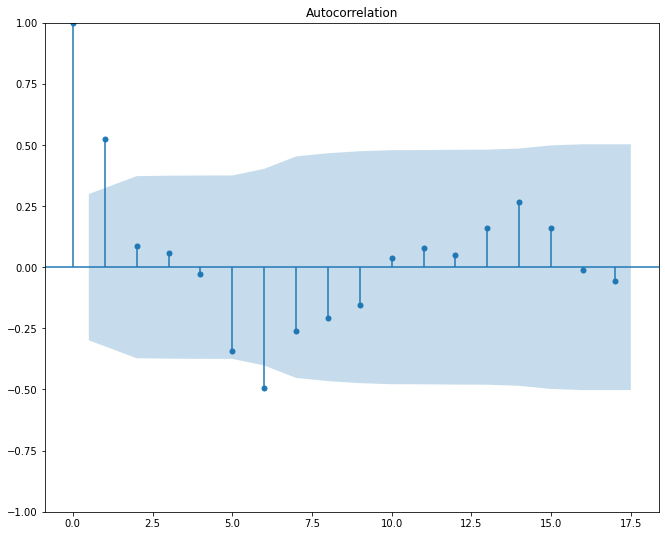

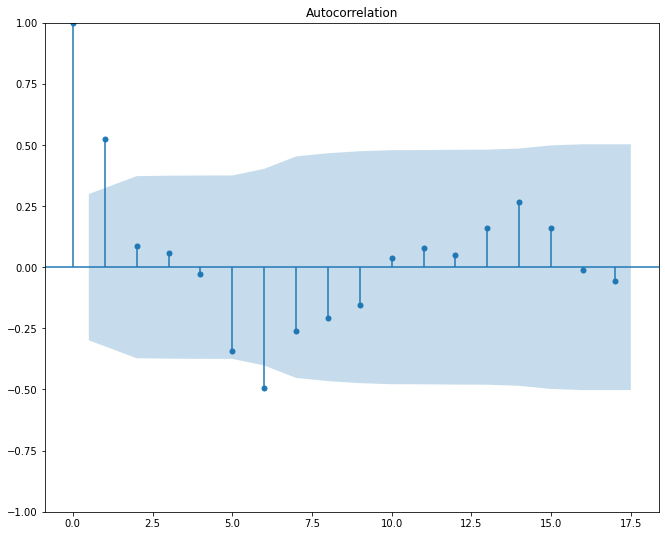

In [97]:
plot_acf(stl.resid)

### Что сделать:
* Построить регрессию от времени
* Построить регрессию от времени + кредиты
* Построить регрессию от кредитов
* Сравнить между собой по r^2,MAE,MAPE
* Экспоненциальное сглаживание


**Модель Хольта-Винтерса**

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [66]:
train = df2['2019':'2021']
train

,amount
date,
2019-01-31,0.000000e+00
2019-02-28,0.000000e+00
2019-03-31,0.000000e+00
2019-04-30,3.351258e+06
2019-05-31,3.351258e+06
2019-06-30,3.512462e+06
2019-07-31,1.527409e+07
2019-08-31,1.527409e+07
2019-09-30,1.527409e+07


In [65]:
test = df2['2022']
test

C:\Temp\ipykernel_16288\1997687877.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df2['2022']


,amount
date,
2022-01-31,2.452139e+09
2022-02-28,2.441731e+09
2022-03-31,2.145387e+09
2022-04-30,1.974752e+09
2022-05-31,1.971281e+09
2022-06-30,1.925256e+09
2022-07-31,1.920206e+09


In [98]:
fit1 = ExponentialSmoothing(train.values, seasonal_periods=6, trend='add', seasonal='add').fit()

C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [100]:
fit1.predict(test.values)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

**Регрессионные модели**


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
x_train = pd.DataFrame(data1.N[:32])
y_train = pd.DataFrame(data1.amount[:32])
x_test = pd.DataFrame(data1.N[32:])
y_test = pd.DataFrame(data1.amount[32:])

In [69]:
model = LinearRegression()

In [70]:
model.fit(x_train, y_train)

LinearRegression()

In [71]:
Y_test = model.predict(x_test)

In [72]:
Y_test

array([[3.90322104e+09],
       [4.05799751e+09],
       [4.21277399e+09],
       [4.36755046e+09],
       [4.52232694e+09],
       [4.67710341e+09],
       [4.83187989e+09],
       [4.98665636e+09],
       [5.14143284e+09],
       [5.29620931e+09],
       [5.45098579e+09]])

In [73]:
y_test

,amount
date,
2021-09-30,5.059666e+09
2021-10-31,5.521585e+09
2021-11-30,5.653194e+09
2021-12-31,4.266043e+09
2022-01-31,2.452139e+09
2022-02-28,2.441731e+09
2022-03-31,2.145387e+09
2022-04-30,1.974752e+09
2022-05-31,1.971281e+09


In [74]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [75]:
mae = mean_absolute_error(y_test, Y_test)
mse = mean_squared_error(y_test, Y_test)
R2 = r2_score(y_test, Y_test)
print(mae, mse, R2)

2203436610.3321967 5.910503982556842e+18 -1.6513729524698673


In [ ]:
y_test